## STUDY CASE (REVISION): Review of Various Products Manufactured by Amazon


### Preparing Text Data for Exploratory Data Analysis (EDA)

We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus. 

In this section, we’ll do the following things:

Stopwords Removal, Lemmatization and Create Document Term Matrix.

Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form. 

We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [19]:
import spacy

In [20]:
nlp = spacy.load("en")

In [21]:
nlp.vocab.length

489

In [22]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [23]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


In [24]:
conda install -c anaconda scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [25]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,...,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,...,0,4,0,0,0,0,2,0,2,0


### Exploratory Data Analysis on Amazon Product Reviews using Python

So, let’s start by looking at the common words present in the reviews for each product. For this, we will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


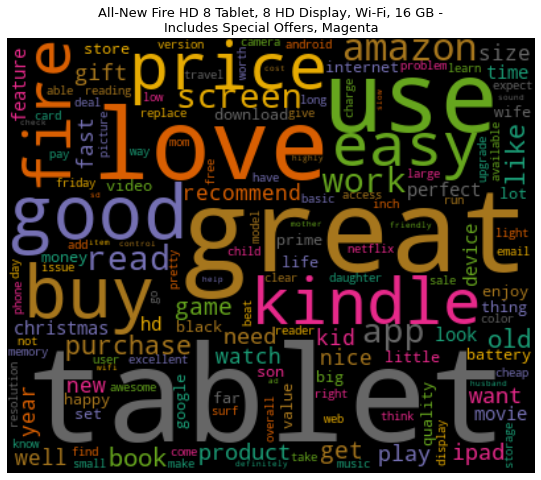

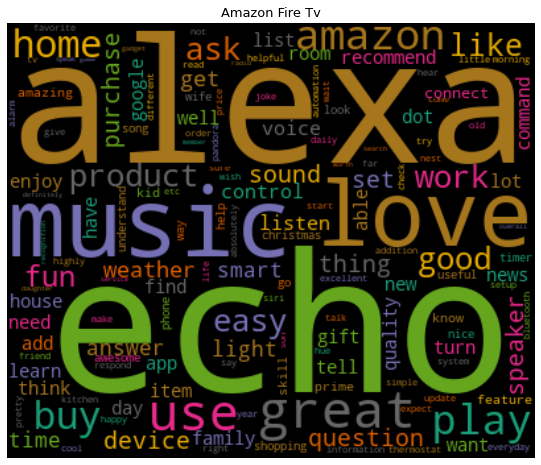

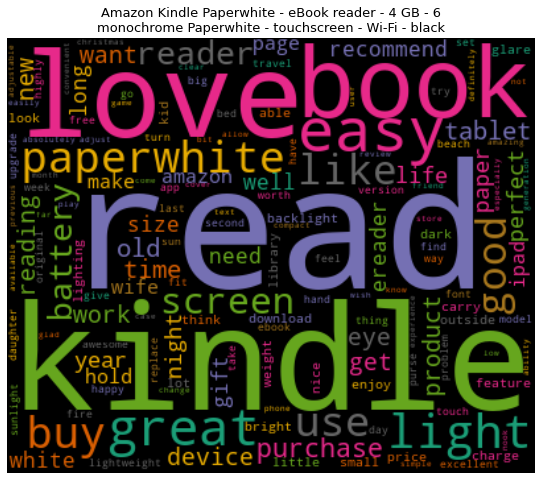

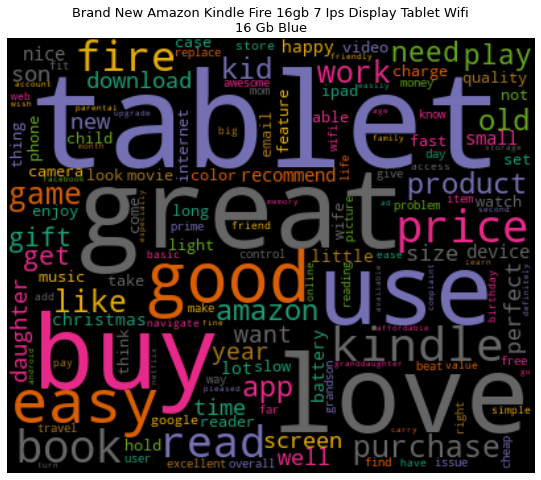

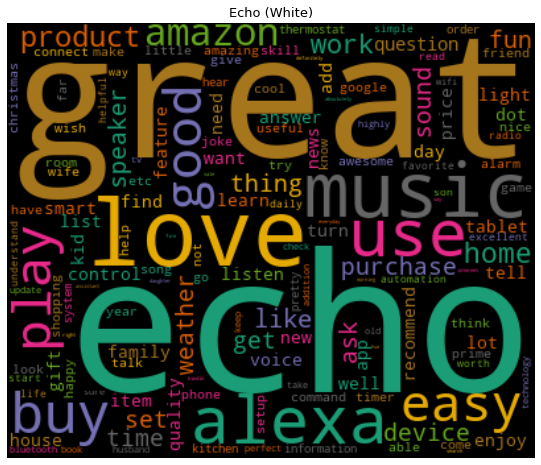

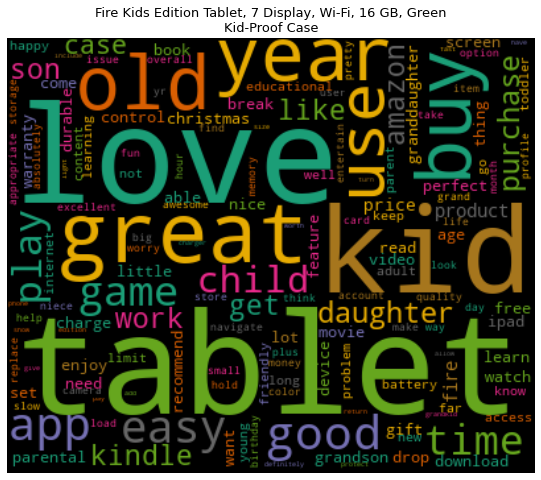

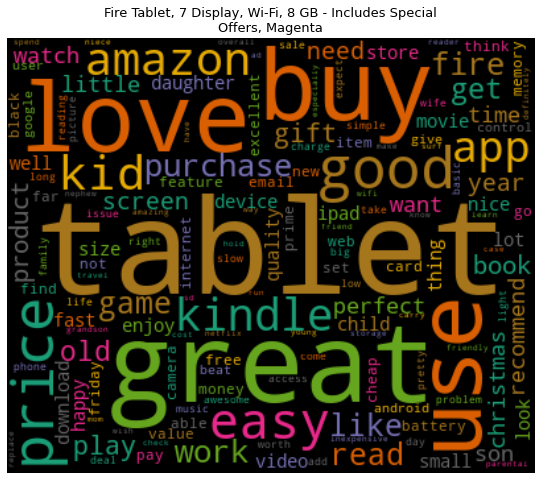

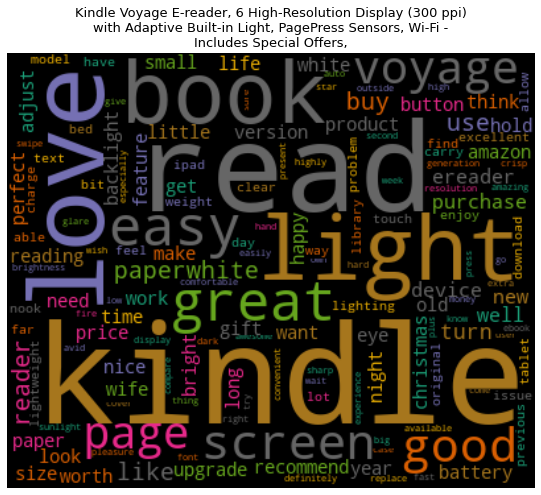

In [27]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Here, we can see that LOVE, USE, BUY, GREAT, and EASY are the most frequently occurring words for almost every product. This means that users are loving products from Amazon and found purchasing them a great decision. They also found them easy to use.

That’s a quick way to generate insights from text data, isn’t it?

Now, let’s say Amazon wants to dig deeper into this and wants to know which products they should improve. We can find the answer to this question by doing a sentiment analysis of the reviews for each product. Sentiment analysis is the analysis of how much a piece of text is positive and opinionated.

Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python:

In [28]:
pip install -U textblob

Requirement already up-to-date: textblob in c:\users\user\anaconda3\lib\site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


In [29]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

Let’s take a look at some of the most positive and negative reviews from the customers:

In [30]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 I got this tablet so I would not have to pack up my laptop when I went to my boyfriend is when I want to do my online class. This is perfect for that
Review 2:
 This tablet is perfect for just about anything you could want to do on a tablet.
Review 3:
 If you are looking for an entry level tablet, this is it.The Kindle fire HD is perfect for kids!


In [31]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 2:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 3:
 Too proprietary, the apps my daughter liked I could not install on it for her so basically it was worthless for me and I returned it.


Let’s plot polarities of reviews for each product and compare them. A bar graph is best suited for this purpose:

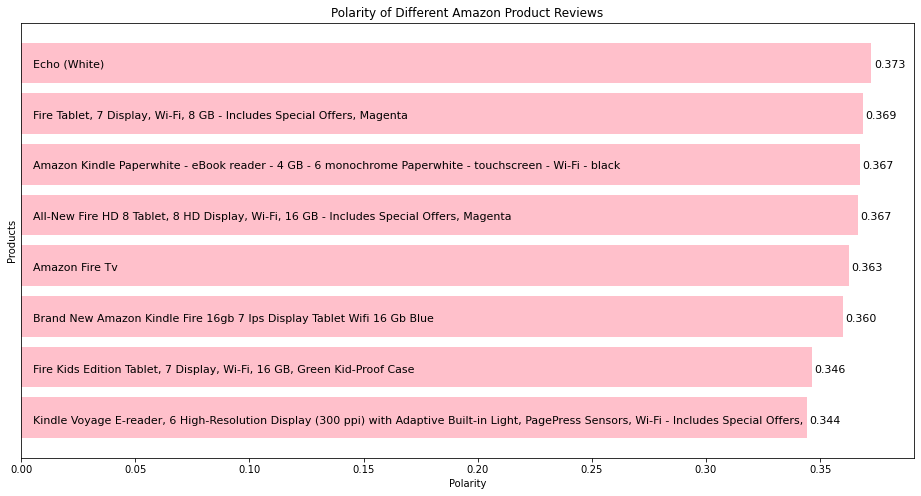

In [32]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='pink',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()


You can see that according to the polarity of reviews, Amazon needs to improve Fire Kids Edition Tablet and Kindle Voyage E-reader. Let’s also take a look at the number of reviewers who recommended a particular product. For this, we can take the percentage of reviewers and plot that:

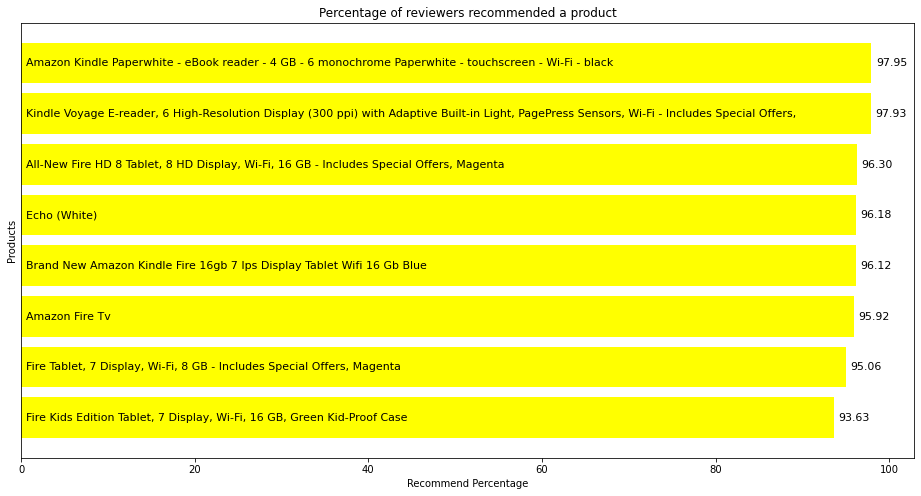

In [33]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='yellow')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='black')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

Here, we can see that the Fire Kids Edition Tablet has the lowest recommendation percentage. It’s reviews also have the lowest polarity. So, we can say that the polarity of reviews affects the chances of a product getting recommended.

Another thing that we can look at is the readability of reviews upvoted as helpful by others. The readability of a text document can be checked using various readability indices like Flesch Reading Ease, Dale Chall Readability Score, and Gunning Fog Index.

For this, we can use the textstat library in Python. Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Textstat is an easy to use library to calculate statistics from text. It helps determine readability, complexity, and grade level. Each of these indices works on a different methodology for determining the readability level of a document.

In [34]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [35]:
from textstat import textstat

In [36]:
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())


Dale Chall Score of upvoted reviews=> 6.148739837398377
Dale Chall Score of not upvoted reviews=> 5.695477993940365


In [37]:
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())


Flesch Reading Score of upvoted reviews=> 81.98257113821124
Flesch Reading Score of not upvoted reviews=> 84.8586581087524


In [38]:
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())


Gunning Fog Index of upvoted reviews=> 7.980264227642276
Gunning Fog Index of not upvoted reviews=> 6.8617784244936715


There is very little difference in the Dale Chall Score and the Flesch Reading Score for helpful and not helpful reviews. But there is a considerable amount of variation in the Gunning Fog Index.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.

In [40]:
from textstat.textstat import textstat

In [41]:
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))


In [42]:
print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


Interesting. Both upvoted and not upvoted reviews are easily understandable by anyone who has completed the 5th or 6th grade in school.

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the reading_time() function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [43]:
df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))


In [44]:
print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())


Reading Time of upvoted reviews=> 3.4542174796747958
Reading Time of not upvoted reviews=> 1.7917397544251397


Surprisingly, the reading time of upvoted reviews is twice that of not upvoted reviews. It means that people usually find longer reviews helpful.

Let’s take a look at the inferences drawn from the above analysis:

1.Customers love products from Amazon. They find them a great purchase and easy to use.

2.Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product.

3.The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school.

4.The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful.

 

### References.

1. https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

2. https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products